In [2]:
from pdf2image import convert_from_path
import pdfplumber
import cv2
import numpy as np 
from math import ceil, floor
from os import listdir
import json
from random import shuffle
import matplotlib.pyplot as plt



ImportError: No module named 'pdf2image'

In [3]:
PDF_DIR = 'dataset/digital_newspaper/'
pdfs = listdir(PDF_DIR)
pdfs.sort()

hindi_chars = [
 'U+0901',
 'U+0902',
 'U+0903',
 'U+0905',
 'U+0906',
 'U+0907',
 'U+0908',
 'U+0909',
 'U+090A',
 'U+090B',
 'U+090F',
 'U+0910',
 'U+0911',
 'U+0913',
 'U+0914',
 'U+0915',
 'U+0916',
 'U+0917',
 'U+0918',
 'U+091A',
 'U+091B',
 'U+091C',
 'U+091D',
 'U+091E',
 'U+091F',
 'U+0920',
 'U+0921',
 'U+0922',
 'U+0923',
 'U+0924',
 'U+0925',
 'U+0926',
 'U+0927',
 'U+0928',
 'U+0929',
 'U+092A',
 'U+092B',
 'U+092C',
 'U+092D',
 'U+092E',
 'U+092F',
 'U+0930',
 'U+0932',
 'U+0935',
 'U+0936',
 'U+0937',
 'U+0938',
 'U+0939',
 'U+093C',
 'U+093E',
 'U+093F',
 'U+0940',
 'U+0941',
 'U+0942',
 'U+0943',
 'U+0945',
 'U+0947',
 'U+0948',
 'U+0949',
 'U+094B',
 'U+094C',
 'U+094D',
 'U+0958',
 'U+0959',
 'U+095B',
 'U+095C',
 'U+095D',
 'U+095E',
 'U+0964',
 'U+0966',
 'U+0967',
 'U+0968',
 'U+0969',
 'U+096A',
 'U+096B',
 'U+096C',
 'U+096D',
 'U+096E',
 'U+096F']

white_spaces = ['\t','U+0008', 'U+0009', 'U+000A', 'U+000B', 'U+000C', 'U+000D', 'U+0020', 'U+0085', 'U+00A0', 'U+1680', 'U+2000', 'U+2001', 'U+2002', 'U+2003', 'U+2004', 'U+2005', 'U+2006', 'U+2007', 'U+2008', 'U+2009', 'U+200A', 'U+2028', 'U+2029', 'U+202F', 'U+205F', 'U+3000']



In [4]:
frm = 0
to = 1000

fout = open('dataset/digital_words_' + str(frm) + '_' + str(to) + '.json','wb')


In [5]:
out = {}

done = {}

word_no = 1
for pdf in pdfs[frm:to]:
    image = convert_from_path(PDF_DIR + pdf, fmt='jpg')
    image = image.pop()
    img = np.asarray(image)
    pdf = pdfplumber.open(PDF_DIR + pdf)
    first_page = pdf.pages[0]
    words = first_page.extract_words()
    #print(words)
    pdf_height = float(first_page.height)
    pdf_width = float(first_page.width)

    img_height = img.shape[0]
    img_width = img.shape[1]

    height_scale = img_height/ pdf_height  
    width_scale = img_width/ pdf_width 
    i = 0
    for word in words:
        xmin = int(floor(float(word['x0']) * width_scale))
        xmax = int(ceil(float(word['x1']) * width_scale))
        ymin = int(floor(float(word['top']) * height_scale))
        ymax = int(ceil(float(word['bottom']) * height_scale))

        patch = img[ymin:ymax, xmin:xmax, :]

        width = patch.shape[1]
        chars = len(word['text'])
        if(chars>70):
            if(i<=2):
                i = i + 1
                continue
            print(word['text'])
            char_dic = {}
            for char in word['text']:
                if('U+%04X' % (ord(char),) in char_dic.keys()):
                    char_dic['U+%04X' % (ord(char),)] += 1
                else:
                    char_dic['U+%04X' % (ord(char),)] = 1
            plt.imshow(patch)
            print(char_dic)
            i = i + 1
            break
        char_length = width / (chars * 1.0)
        process_this = 1
        for char in word['text']:
            if not ('U+%04X' % (ord(char),) in white_spaces or 'U+%04X' % (ord(char),) in hindi_chars):
                process_this = 0
    if(i>3):
        break
        '''
        print('here')
        if process_this and patch.shape[1] > patch.shape[0] and patch.shape[1] > 10:
            for ch in word['text']:
                if 'U+%04X' % (ord(ch),) in white_spaces:
                    locations = [pos for pos, char in enumerate(word['text']) if char == ch]
                    locations = [0] + locations + [width-1]
                    print('init')
                    for l in range(len(locations)-1):
                        
                        start = int(floor(locations[l] * char_length))
                        end = int(ceil((locations[l]+1) * char_length))
                        word_patch = patch[:,start:end,:]
                        word_text = word['text'][locations[l]:locations[l]+1]
                        word_text = word_text.replace(ch,'')
                        
                        if word_text + '_' + str(word_patch.shape[0]) + '_' + str(word_patch.shape[1]) not in done and word_patch.shape[1] > word_patch.shape[0] and word_patch.shape[1] > 10 and word_patch.shape[0] > 0:
                            word_no += 1
                        plt.imshow(word_patch)
                        print(word_text)
            
            if '\x08' in word['text']:
                locations = [pos for pos, char in enumerate(word['text']) if char == '\x08']
                locations = [0] + locations + [width-1]
                print('init1')
                for l in range(len(locations)-1):
                    start = int(floor(locations[l] * char_length))
                    end = int(ceil((locations[l]+1) * char_length))

                    word_patch = patch[:,start:end,:]

                    word_text = word['text'][locations[l]:locations[l]+1]
                    word_text = word_text.replace('\x08','')

                    if ((word_text + '_' + str(word_patch.shape[0]) + '_' + str(word_patch.shape[1])) not in done) and word_patch.shape[1] > word_patch.shape[0] and word_patch.shape[1] > 10 and word_patch.shape[0] > 0:
                        plt.imshow(word_patch)
                        print(word_text)
                        word_no += 1
            elif '\u200c' in word['text']:
                locations = [pos for pos, char in enumerate(word['text']) if char == '\u200c']
                locations = [0] + locations + [width-1]
                print('init3')
                for l in range(len(locations)-1):
                    start = int(floor(locations[l] * char_length))
                    end = int(ceil((locations[l]+1) * char_length))

                    word_patch = patch[:,start:end,:]

                    word_text = word['text'][locations[l]:locations[l]+1]
                    word_text = word_text.replace('\u200c','')

                    if word_text + '_' + str(word_patch.shape[0]) + '_' + str(word_patch.shape[1]) not in done and word_patch.shape[1] > word_patch.shape[0] and word_patch.shape[1] > 10 and word_patch.shape[0] > 0:
                        plt.imshow(word_patch)
                        print(word_text)
                        word_no += 1
            else:
                print('init')
                word_text =  word['text']
                if '\u3000' in word['text']:
                    word_text = word['text'].replace('\u3000', '')

                if '\ufb01' in word['text']:
                    word_text = word['text'].replace('\ufb01','fi')

                if '\ufb02' in word['text']:
                    word_text = word['text'].replace('\ufb02','fl')

                if word_text + '_' + str(patch.shape[0]) + '_' + str(patch.shape[1]) not in done  and patch.shape[0] > 0 and patch.shape[1] > 0:
                    plt.imshow(word_patch)
                    print(word_text)
                    word_no += 1'''
                        

KeyboardInterrupt: 

वकलिावनरा,


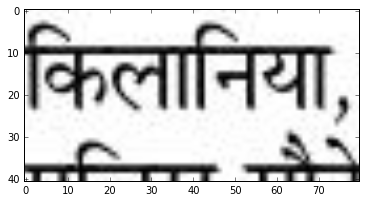

In [6]:
out = {}

done = {}

word_no = 2
for pdf in pdfs[frm:to]:
    image = convert_from_path(PDF_DIR + pdf, fmt='jpg')
    image = image.pop()
    img = np.asarray(image)
    pdf = pdfplumber.open(PDF_DIR + pdf)
    first_page = pdf.pages[0]
    words = first_page.extract_words()
    #print(words)
    pdf_height = float(first_page.height)
    pdf_width = float(first_page.width)

    img_height = img.shape[0]
    img_width = img.shape[1]

    height_scale = img_height/ pdf_height  
    width_scale = img_width/ pdf_width 
    i = 0
    for word in words:
        xmin = int(floor(float(word['x0']) * width_scale))
        xmax = int(ceil(float(word['x1']) * width_scale))
        ymin = int(floor(float(word['top']) * height_scale))
        ymax = int(ceil(float(word['bottom']) * height_scale))

        patch = img[ymin:ymax, xmin:xmax, :]

        width = patch.shape[1]
        chars = len(word['text'])
        if(chars>9):
            if(i<=2):
                i = i + 1
                continue
            print(word['text'])
            plt.imshow(patch)
            i = i + 1
            break
        char_length = width / (chars * 1.0)
        process_this = 1
        for char in word['text']:
            if not ('U+%04X' % (ord(char),) in white_spaces or 'U+%04X' % (ord(char),) in hindi_chars):
                process_this = 0
    if(i>3):
        break

In [7]:
fin = open('dataset/digital_words_clean_1000_2000.json', 'rb')
words = json.load(fin)
fin.close()

सककूजलंग
[u'\u0938\u0915\u0915\u0942\u091c\u0932\u0902\u0917']


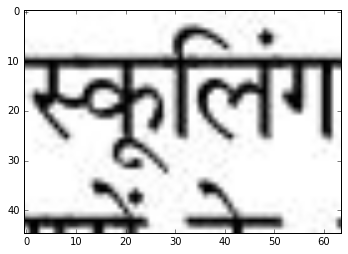

In [16]:
word_no = 0
print words[str(words.keys()[word_no]).zfill(10)]
print words[str(words.keys()[word_no]).zfill(10)].split()
img = cv2.imread('dataset/digital_words_clean/' + str(words.keys()[word_no]).zfill(10) + '.png')
plt.imshow(img)

In [23]:
print u'\u0938'
print u'\u0915'
print u'\u0915'
print  u'\u0942'
print u'\u091c'
print u'\u0932'

स
क
क
ू
ज
ल


In [20]:
print u'\u0938\u0915\u0915\u0942\u091c\u0932\u0902\u0917'

सककूजलंग


In [2]:
import cv2

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

In [16]:
img = cv2.imread('../dataset/nai_duniya_words_clean/0000000006.png')

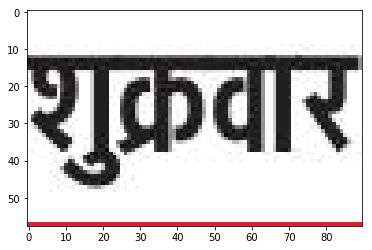

In [17]:
plt.imshow(img)